## Importing libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [131]:
pd.options.mode.chained_assignment = None

## Reading the dataset

In [132]:
data = pd.read_excel("/Data Science/_Projects/Doing/E_Commerce/E-Commerce KPI Analysis/Global skincare and Beauty e-store_E-commerce Analysis_English.xlsx")
data.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


In [133]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Customer ID', 'Segment', 'City',
       'State', 'Country', 'Country latitude', 'Country longitude', 'Region',
       'Market', 'Subcategory', 'Category', 'Product', 'Quantity', 'Sales',
       'Discount', 'Profit'],
      dtype='object')

In [134]:
data['Row ID'].unique()

array([46682, 10124,  9067, ..., 19359,  9475, 31942], shape=(51290,))

In [135]:
data.shape

(51290, 19)

In [136]:
data['Product'].unique() # COUNT OF PRODUCTS

array(['Head & Shoulders Classic Clean Shampoo',
       "Kiehl's Ultra Facial Overnight Hydrating Masque",
       'Golden Vine Bracelet', ...,
       'Caress Evenly Gorgeous Exfoliating Body Wash with Burnt Brown Sugar & Karite Butter',
       'Nivea Moisturizing Sun-Kissed Radiance Shower Cream',
       'Burberry Kisses Military Red'], shape=(3577,), dtype=object)

In [137]:
data.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64

## Describtive Statistics

In [138]:
data.describe()

,Row ID,Order Date,Country latitude,Country longitude,Quantity,Sales,Discount,Profit
count,51290.00000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2022-05-11 21:26:49.155780608,24.506298,-4.585665,5.415832,127.074946,0.142908,20.772346
min,1.00000,2020-01-01 00:00:00,-40.900557,-106.346771,1.000000,2.000000,0.000000,-1746.000000
25%,12823.25000,2021-06-19 00:00:00,12.879721,-95.712891,2.000000,25.000000,0.000000,0.000000
50%,25645.50000,2022-07-08 00:00:00,35.861660,2.213749,4.000000,56.000000,0.000000,7.200000
75%,38467.75000,2023-05-22 00:00:00,38.963745,43.679291,7.000000,132.000000,0.200000,25.000000
max,51290.00000,2023-12-31 00:00:00,61.924110,174.885971,20.000000,3940.000000,0.850000,1820.000000
std,14806.29199,NaN,24.119393,80.298692,4.908234,236.074764,0.212280,83.582680


In [139]:
numeric_data = data[["Quantity", "Sales",	"Discount",	"Profit"]].describe()

In [140]:
numeric_data.describe()

,Quantity,Sales,Discount,Profit
count,8.000000,8.000000,8.000000,8.000000
mean,6416.790508,6976.018714,6411.425648,6437.569378
std,18131.515656,17956.145273,18133.682433,18148.178635
min,1.000000,2.000000,0.000000,-1746.000000
25%,3.500000,48.250000,0.000000,5.400000
50%,5.162033,129.537473,0.171454,22.886173
75%,10.250000,1162.056073,0.371710,517.687010
max,51290.000000,51290.000000,51290.000000,51290.000000


In [141]:
data['Product'].value_counts()

Product
Herbal Essences Bio                                       335
Neutrogena Hydro Boost Gel Cream                          227
Essie Nail Polish Aruba Blue Shimmering Cobalt             92
Head & Shoulders Classic Clean Conditioner                 90
Redken Color Extend Magnetics Conditioner                  84
                                                         ... 
Le Petit Marseillais Shea Butter & Acacia Shower Cream      1
Rose Gold Dream Earrings                                    1
Tom Ford Olympea                                            1
Kiehl's Superbly Restorative Argan Body Lotion              1
Aveda Stress-Fix Bath Soak                                  1
Name: count, Length: 3577, dtype: int64

## Creating Customers Table (Dim Table)

In [142]:
Customers = data[['Customer ID', 'Segment']]

In [143]:
Customers.head(5)

,Customer ID,Segment
0,LW-699061,Corporate
1,BT-1130518,Self-Employed
2,AW-1093031,Self-Employed
3,BT-1130531,Self-Employed
4,KM-1666027,Consumer


In [144]:
Customers.shape

(51290, 2)

In [145]:
Customers['Customer ID'].is_unique

False

In [146]:
Customers.Segment.is_unique

False

In [147]:
Customers = Customers.drop_duplicates(subset='Customer ID')

In [148]:
Customers.shape

(17415, 2)

## Creating Products Table (Dim Table)

In [149]:
print(data['Row ID'].is_unique)
print(data['Product'].is_unique)

True
False


In [150]:
data['Product ID'] = data['Product'].rank(method='dense').astype(int)

In [151]:
unique_products = data[["Product ID", "Product"]]
unique_products.head()

,Product ID,Product
0,1317,Head & Shoulders Classic Clean Shampoo
1,1570,Kiehl's Ultra Facial Overnight Hydrating Masque
2,1289,Golden Vine Bracelet
3,1518,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...
4,2211,NARS Single Eyeshadow Sophia Cool Brown


In [152]:
unique_products['Subcategory_ID'] = data['Subcategory'].rank(method='dense').astype('int')
unique_products.head()

,Product ID,Product,Subcategory_ID
0,1317,Head & Shoulders Classic Clean Shampoo,6
1,1570,Kiehl's Ultra Facial Overnight Hydrating Masque,6
2,1289,Golden Vine Bracelet,6
3,1518,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,6
4,2211,NARS Single Eyeshadow Sophia Cool Brown,6


In [153]:
unique_products.shape

(51290, 3)

In [154]:
unique_products = unique_products.drop_duplicates(subset='Product ID')

In [155]:
unique_products.shape

(3577, 3)

In [156]:
unique_products['Product'].value_counts()

Product
Burberry Kisses Military Red                                  1
Head & Shoulders Classic Clean Shampoo                        1
Kiehl's Ultra Facial Overnight Hydrating Masque               1
Golden Vine Bracelet                                          1
Kiehl's Crème de Corps Smoothing Oil-to-Foam Body Cleanser    1
                                                             ..
Solgar CoQ10                                                  1
Garden of Life Omega-3 Fish Oil                               1
Kiehl's Super Multi-Corrective Eye-Opening Serum              1
Jo Malone Gentleman                                           1
MAC 217 Blending Brush                                        1
Name: count, Length: 3577, dtype: int64

In [157]:
Products = unique_products

In [158]:
Products.head()

,Product ID,Product,Subcategory_ID
0,1317,Head & Shoulders Classic Clean Shampoo,6
1,1570,Kiehl's Ultra Facial Overnight Hydrating Masque,6
2,1289,Golden Vine Bracelet,6
3,1518,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,6
4,2211,NARS Single Eyeshadow Sophia Cool Brown,6


In [159]:
Products.to_excel('/Data Science/_Projects/Doing/E_Commerce/Datewarehouse/Product.xlsx', index=False)

In [160]:
del unique_products

In [161]:
Products.isnull().sum()

Product ID        0
Product           0
Subcategory_ID    0
dtype: int64

## Creating Orders Location Table (Dim Table)

In [162]:
location = data[['City', 'State', 'Country', 'Country latitude', 'Country longitude', 'Region', 'Market']]

In [163]:
location.head(5)

,City,State,Country,Country latitude,Country longitude,Region,Market
0,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific
1,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM
2,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM
3,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM
4,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific


In [164]:
location.shape

(51290, 7)

In [165]:
location[location['City'] == 'Huadian']

,City,State,Country,Country latitude,Country longitude,Region,Market
4,Huadian,Jilin,China,35.86166,104.195397,Eastern Asia,Asia Pacific
39398,Huadian,Jilin,China,35.86166,104.195397,Eastern Asia,Asia Pacific


In [166]:
location = location.drop_duplicates(subset='City')

In [167]:
location.shape

(3650, 7)

In [168]:
location.head(10)

,City,State,Country,Country latitude,Country longitude,Region,Market
0,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific
1,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM
2,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM
3,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM
4,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific
5,Budapest,Budapest,Hungary,47.162494,19.503304,Eastern Europe,Europe
6,Dunedin,Otago,New Zealand,-40.900557,174.885971,Oceania,Asia Pacific
7,Tijuana,Baja California,Mexico,23.634501,-102.552784,Central America,LATAM
8,Bossier City,Louisiana,United States,37.090240,-95.712891,Southern US,USCA
9,Sesto San Giovanni,Lombardy,Italy,41.871940,12.567380,Southern Europe,Europe


In [169]:
location.tail(10)

,City,State,Country,Country latitude,Country longitude,Region,Market
49952,Yangquan,Shanxi,China,35.861660,104.195397,Eastern Asia,Asia Pacific
50008,El Escorial,Madrid,Spain,40.463667,-3.749220,Southern Europe,Europe
50052,Elbeuf,Normandy,France,46.227638,2.213749,Western Europe,Europe
50122,Xuanhua,Hebei,China,35.861660,104.195397,Eastern Asia,Asia Pacific
50304,Kopeysk,Chelyabinsk,Russia,61.524010,105.318756,Eastern Europe,Europe
50688,Goldsboro,North Carolina,United States,37.090240,-95.712891,Southern US,USCA
50712,Asti,Piedmont,Italy,41.871940,12.567380,Southern Europe,Europe
51089,South Shields,England,United Kingdom,55.378051,-3.435973,Northern Europe,Europe
51158,Cuxhaven,Lower Saxony,Germany,51.165691,10.451526,Western Europe,Europe
51242,Abilene,Texas,United States,37.090240,-95.712891,Central US,USCA


In [170]:
location['Location_Key'] = location['Country'] + '_' + location['State'] + '_' + location['City']

In [171]:
location.head(5)

,City,State,Country,Country latitude,Country longitude,Region,Market,Location_Key
0,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,Iraq_Ninawa_Mosul
1,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,Brazil_Alagoas_Pilar
2,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,Cuba_Santiago de Cuba_Santiago de Cuba
3,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,Cuba_Granma_Manzanillo
4,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,China_Jilin_Huadian


In [172]:
location.shape

(3650, 8)

In [173]:
location['City'].is_unique

True

In [174]:
location['Location_Key'].is_unique

True

In [175]:
for col in location.columns:
    if location[col].is_unique == True:
        print(f"{col} is Unique")
    else:
        print(f"{col} is not unique")

City is Unique
State is not unique
Country is not unique
Country latitude is not unique
Country longitude is not unique
Region is not unique
Market is not unique
Location_Key is Unique


In [176]:
Orders_location = location[['Location_Key', 'City', 'Country', 'State', 'Region', 'Country latitude', 'Country longitude', 'Market']]

In [177]:
Orders_location.head(5)

,Location_Key,City,Country,State,Region,Country latitude,Country longitude,Market
0,Iraq_Ninawa_Mosul,Mosul,Iraq,Ninawa,Western Asia,33.223191,43.679291,Asia Pacific
1,Brazil_Alagoas_Pilar,Pilar,Brazil,Alagoas,South America,-14.235004,-51.925280,LATAM
2,Cuba_Santiago de Cuba_Santiago de Cuba,Santiago de Cuba,Cuba,Santiago de Cuba,Caribbean,21.521757,-77.781167,LATAM
3,Cuba_Granma_Manzanillo,Manzanillo,Cuba,Granma,Caribbean,21.521757,-77.781167,LATAM
4,China_Jilin_Huadian,Huadian,China,Jilin,Eastern Asia,35.861660,104.195397,Asia Pacific


In [178]:
Orders_location.to_excel('/Data Science/_Projects/Doing/E_Commerce/Datewarehouse/Orders_location.xlsx', index=False)

In [179]:
del location

In [180]:
Orders_location.isnull().sum()

Location_Key         0
City                 0
Country              0
State                0
Region               0
Country latitude     0
Country longitude    0
Market               0
dtype: int64

## Creating Category and Subcategory Tables (Dim Tables)

In [181]:
Products_Categories = data[['Category']]

In [182]:
Products_Categories.value_counts()

Category            
Body care               21062
Home and Accessories     9516
Make up                  9017
Hair care                8203
Face care                3492
Name: count, dtype: int64

In [183]:
Products_Categories.head()

,Category
0,Body care
1,Body care
2,Body care
3,Body care
4,Body care


In [184]:
Products_Categories.shape

(51290, 1)

In [185]:
Products_Categories['Category ID'] = Products_Categories['Category'].rank(method='dense').astype(int)
Products_Categories.head(5)

,Category,Category ID
0,Body care,1
1,Body care,1
2,Body care,1
3,Body care,1
4,Body care,1


In [186]:
Products_Categories = Products_Categories.drop_duplicates(subset='Category ID')
Products_Categories.head()

,Category,Category ID
0,Body care,1
21062,Face care,2
24554,Hair care,3
32757,Home and Accessories,4
42273,Make up,5


In [187]:
Products_Categories.shape

(5, 2)

In [188]:
Products_Categories.to_excel('/Data Science/_Projects/Doing/E_Commerce/Datewarehouse/Products_Category.xlsx', index=False)

In [189]:
Products_Subcategories = data[['Subcategory']]
Products_Subcategories.head()

,Subcategory
0,"bath oils, bubbles and soaks"
1,"bath oils, bubbles and soaks"
2,"bath oils, bubbles and soaks"
3,"bath oils, bubbles and soaks"
4,"bath oils, bubbles and soaks"


In [190]:
Products_Subcategories['Category_ID'] = data['Category'].rank(method='dense').astype(int)
Products_Subcategories.head(5)

,Subcategory,Category_ID
0,"bath oils, bubbles and soaks",1
1,"bath oils, bubbles and soaks",1
2,"bath oils, bubbles and soaks",1
3,"bath oils, bubbles and soaks",1
4,"bath oils, bubbles and soaks",1


In [191]:
Products_Subcategories.shape

(51290, 2)

In [192]:
Products_Subcategories.value_counts()

Subcategory                   Category_ID
Nail care products            1              6146
shampoos and conditioners     3              5049
Eye shadows and pencils       5              4864
face moisturizing products    2              3492
vitamins and supplements      1              3434
brushes and applicators       4              3357
hair colors and toners        3              3154
Accessories                   4              3075
body moisturizers             1              2601
hand creams                   1              2601
foundations and concealers    5              2411
face masks and exfoliators    1              2407
bath oils, bubbles and soaks  1              2387
candles, sprays, diffusers    4              2223
Lipsticks                     5              1742
Body soaps and washes         1              1486
fragrances                    4               861
Name: count, dtype: int64

In [193]:
Products_Subcategories['Subcategory ID'] = Products_Subcategories['Subcategory'].rank(method='dense').astype(int)
Products_Subcategories.head(5)

,Subcategory,Category_ID,Subcategory ID
0,"bath oils, bubbles and soaks",1,6
1,"bath oils, bubbles and soaks",1,6
2,"bath oils, bubbles and soaks",1,6
3,"bath oils, bubbles and soaks",1,6
4,"bath oils, bubbles and soaks",1,6


In [194]:
Products_Subcategories = Products_Subcategories.drop_duplicates(subset='Subcategory ID')
Products_Subcategories.head()

,Subcategory,Category_ID,Subcategory ID
0,"bath oils, bubbles and soaks",1,6
2387,body moisturizers,1,7
4988,Body soaps and washes,1,2
6474,face masks and exfoliators,1,10
8881,hand creams,1,15


In [195]:
Products_Subcategories.shape

(17, 3)

In [196]:
Products_Subcategories.to_excel('/Data Science/_Projects/Doing/E_Commerce/Datewarehouse/Products_Subcategory.xlsx', index=False)

In [197]:
Products_Subcategories.isnull().sum()

Subcategory       0
Category_ID       0
Subcategory ID    0
dtype: int64

# Finding and Dealing with Outliers
1. # Sales Column

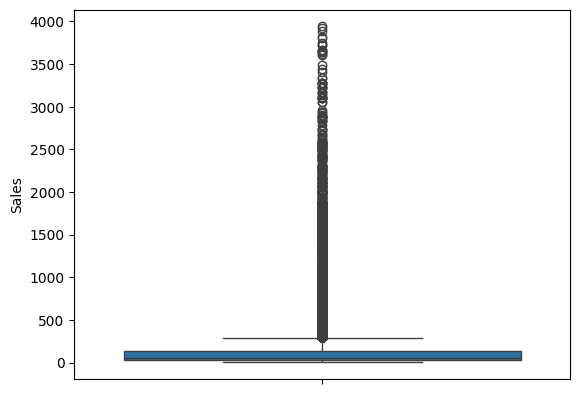

In [198]:
sns.boxplot(data['Sales'])
plt.show()

## Identify 75th and 25th percentile, then identify IQR

In [199]:
def IQR_75th_25th(column):
    the_25th = column.quantile(0.25)
    the_75th = column.quantile(0.75)
    IQR = the_75th - the_25th
    return the_25th, the_75th, IQR

In [200]:
twinty_fifth, seventy_fifth, IQR = IQR_75th_25th(data['Sales'])

In [201]:
print(f"25th quantile = {twinty_fifth}\n75th quantile = {seventy_fifth}\nIQR = {IQR}")

25th quantile = 25.0
75th quantile = 132.0
IQR = 107.0


In [202]:
lower = twinty_fifth - (1.5 * IQR)
upper = seventy_fifth + (1.5 * IQR)
print(f"Lower Limit = {lower}\nUpper Limit = {upper}")

Lower Limit = -135.5
Upper Limit = 292.5


In [203]:
len(data[data['Sales'] < 0])

0

In [204]:
data[data['Profit'] > data['Sales']]

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Product ID


In [205]:
data[data['Profit'] < -0.5 * data['Sales']][['Quantity', 'Discount', 'Profit', 'Sales']]

,Quantity,Discount,Profit,Sales
2395,17,0.7,-51.0,85
2398,6,0.7,-43.2,72
2491,17,0.7,-71.4,119
2577,1,0.7,-25.2,42
2770,3,0.7,-30.6,51
...,...,...,...,...
42211,3,0.7,-86.4,144
42224,1,0.7,-4.2,7
42230,4,0.7,-199.2,332
42253,7,0.7,-54.6,91


In [206]:
max(data['Discount'])

0.85

In [207]:
data[data['Profit'] < -data['Discount']][['Profit', 'Discount']]

,Profit,Discount
1,-4.0,0.6
18,-2.8,0.7
53,-4.0,0.6
76,-1.6,0.6
78,-7.6,0.7
...,...,...
51269,-11.7,0.5
51275,-7.8,0.5
51276,-9.6,0.5
51280,-33.6,0.6


In [208]:
def classify_profit(row):
    if row['Profit'] >= 0:
        return 'Profit (Positive)'
    elif row['Profit'] >= -row['Sales']:
        return 'Loss (Normal)'
    else:
        return 'Loss (Invalid)'

In [209]:
data['Profit_Status'] = data.apply(classify_profit, axis=1)
data['Profit_Status'].value_counts()

Profit_Status
Profit (Positive)    40249
Loss (Normal)        11041
Name: count, dtype: int64

In [210]:
# Normal Profit
data[data['Profit_Status'] == 'Profit (Positive)'].head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,...,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Product ID,Profit_Status
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0,1317,Profit (Positive)
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,...,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5,1289,Profit (Positive)
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,...,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0,1518,Profit (Positive)
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5,2211,Profit (Positive)
5,48227,HU-2012-ER385557-40918,2020-01-10,ER-385557,Corporate,Budapest,Budapest,Hungary,47.162494,19.503304,...,Europe,"bath oils, bubbles and soaks",Body care,Nature's Bounty B-Complex,8,352,0.0,176.0,2274,Profit (Positive)


In [211]:
# Normal Loss
data[data['Profit_Status'] == 'Loss (Normal)'].head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,...,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Product ID,Profit_Status
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,...,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0,1570,Loss (Normal)
18,45000,NI-2012-DP316595-40938,2020-01-30,DP-316595,Consumer,Kano,Kano,Nigeria,9.081999,8.675277,...,Africa,"bath oils, bubbles and soaks",Body care,Maybelline Color Tattoo 24HR Eyeshadow Fierce ...,1,14,0.7,-2.8,2088,Loss (Normal)
53,10049,US-2012-DW1348018-41000,2020-04-01,DW-1348018,Self-Employed,Limoeiro do Norte,Ceará,Brazil,-14.235004,-51.925280,...,LATAM,"bath oils, bubbles and soaks",Body care,Revlon Colorsilk - Ultra Light Sun Blonde,2,40,0.6,-4.0,2782,Loss (Normal)
76,49951,TU-2012-MB8085134-41021,2020-04-22,MB-8085134,Consumer,Balikesir,Balikesir,Turkey,38.963745,35.243322,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,Zoya Nail Polish Jacqueline Soft Cream,2,16,0.6,-1.6,3559,Loss (Normal)
78,43522,KZ-2012-JM553568-41023,2020-04-24,JM-553568,Consumer,Astana,Astana,Kazakhstan,48.019573,66.923684,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Larger Than Life Long-Wear Eyeliner Barro...,2,38,0.7,-7.6,2188,Loss (Normal)


In [212]:
# Invalid Loss
data[data['Profit_Status'] == 'Loss (Invalid)'].head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,...,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Product ID,Profit_Status


In [213]:
data[(data['Sales'] > upper)]

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,...,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Product ID,Profit_Status
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.00,300.0,1317,Profit (Positive)
5,48227,HU-2012-ER385557-40918,2020-01-10,ER-385557,Corporate,Budapest,Budapest,Hungary,47.162494,19.503304,...,Europe,"bath oils, bubbles and soaks",Body care,Nature's Bounty B-Complex,8,352,0.00,176.0,2274,Profit (Positive)
10,36761,CA-2012-TS21340140-40928,2020-01-20,TS-213401404,Consumer,Scottsdale,Arizona,United States,37.090240,-95.712891,...,USCA,"bath oils, bubbles and soaks",Body care,Jo Malone Gentleman,5,305,0.20,91.5,1464,Profit (Positive)
11,48118,MG-2012-SH997584-40929,2020-01-21,SH-997584,Corporate,Ulan Bator,Ulaanbaatar,Mongolia,46.862496,103.846656,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,Kiehl's Super Multi-Corrective Eye-Opening Serum,17,782,0.00,391.0,1560,Profit (Positive)
12,30882,IN-2012-JM1558092-40932,2020-01-24,JM-1558092,Consumer,Wellington,Wellington,New Zealand,-40.900557,174.885971,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,Garden of Life Omega-3 Fish Oil,14,672,0.00,336.0,1057,Profit (Positive)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51252,21485,ID-2015-TP2156559-42355,2023-12-17,TP-2156559,Corporate,Surakarta,Jawa Tengah,Indonesia,-0.789275,113.921327,...,Asia Pacific,Lipsticks,Make up,BioSchwartz Magnesium Citrate,18,630,0.17,144.9,200,Profit (Positive)
51253,1899,MX-2015-MY1829593-42355,2023-12-17,MY-1829593,Corporate,Matagalpa,Matagalpa,Nicaragua,12.865416,-85.207229,...,LATAM,Lipsticks,Make up,Lancôme La Vie Est Belle,7,301,0.00,120.4,1888,Profit (Positive)
51256,4512,MX-2015-CJ1187593-42356,2023-12-18,CJ-1187593,Corporate,Granada,Granada,Nicaragua,12.865416,-85.207229,...,LATAM,Lipsticks,Make up,Thorne Research Multivitamin for Women,17,663,0.00,265.2,3290,Profit (Positive)
51260,12475,ES-2015-AS1022545-42357,2023-12-19,AS-1022545,Corporate,Villefontaine,Auvergne-Rhône-Alpes,France,46.227638,2.213749,...,Europe,Lipsticks,Make up,Dove Pure Care Dry Oil Conditioner,15,555,0.10,166.5,813,Profit (Positive)


## Creating Sales Table (Fact Table)

In [214]:
Sales_Orders = data

In [215]:
Sales_Orders.head(5)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,...,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Product ID,Profit_Status
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0,1317,Profit (Positive)
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,...,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0,1570,Loss (Normal)
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,...,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5,1289,Profit (Positive)
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,...,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0,1518,Profit (Positive)
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,...,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5,2211,Profit (Positive)


In [216]:
Sales_Orders.dtypes

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Customer ID                  object
Segment                      object
City                         object
State                        object
Country                      object
Country latitude            float64
Country longitude           float64
Region                       object
Market                       object
Subcategory                  object
Category                     object
Product                      object
Quantity                      int64
Sales                         int64
Discount                    float64
Profit                      float64
Product ID                    int64
Profit_Status                object
dtype: object

In [217]:
Sales_Orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Customer ID', 'Segment', 'City',
       'State', 'Country', 'Country latitude', 'Country longitude', 'Region',
       'Market', 'Subcategory', 'Category', 'Product', 'Quantity', 'Sales',
       'Discount', 'Profit', 'Product ID', 'Profit_Status'],
      dtype='object')

In [218]:
Sales_Orders['Date_ID'] = Sales_Orders['Order Date'].astype(str).str.replace('-','')

In [219]:
Sales_Orders['Date_ID'] = Sales_Orders['Date_ID'].astype(int)

In [220]:
Sales_Orders.dtypes

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Customer ID                  object
Segment                      object
City                         object
State                        object
Country                      object
Country latitude            float64
Country longitude           float64
Region                       object
Market                       object
Subcategory                  object
Category                     object
Product                      object
Quantity                      int64
Sales                         int64
Discount                    float64
Profit                      float64
Product ID                    int64
Profit_Status                object
Date_ID                       int64
dtype: object

In [221]:
Sales_Orders['Location_ID'] = Sales_Orders['Country'] + '_' + Sales_Orders['State'] + '_' + Sales_Orders['City']

In [222]:
Sales_Orders = Sales_Orders[['Order ID','Customer ID','Date_ID','Location_ID', 'Product ID', 'Quantity', 'Sales', 'Discount', 'Profit']]
Sales_Orders.head(5)

,Order ID,Customer ID,Date_ID,Location_ID,Product ID,Quantity,Sales,Discount,Profit
0,IZ-2012-LW699061-40911,LW-699061,20200103,Iraq_Ninawa_Mosul,1317,20,600,0.0,300.0
1,US-2012-BT1130518-40912,BT-1130518,20200104,Brazil_Alagoas_Pilar,1570,2,40,0.6,-4.0
2,MX-2012-AW1093031-40912,AW-1093031,20200104,Cuba_Santiago de Cuba_Santiago de Cuba,1289,1,151,0.0,75.5
3,MX-2012-BT1130531-40912,BT-1130531,20200104,Cuba_Granma_Manzanillo,1518,4,40,0.0,20.0
4,IN-2012-KM1666027-40914,KM-1666027,20200106,China_Jilin_Huadian,2211,1,11,0.0,5.5


In [223]:
Sales_Orders.shape

(51290, 9)

In [224]:
Sales_Orders = Sales_Orders.drop_duplicates(subset='Order ID')

In [225]:
Sales_Orders.shape

(25728, 9)

In [226]:
Sales_Orders.to_excel('/Data Science/_Projects/Doing/E_Commerce/Datewarehouse/Sales_Orders.xlsx', index=False)

In [227]:
Sales_Orders.isnull().sum()

Order ID       0
Customer ID    0
Date_ID        0
Location_ID    0
Product ID     0
Quantity       0
Sales          0
Discount       0
Profit         0
dtype: int64

## Creating Dates Table (Dim Table)

In [228]:
Dates = data[['Date_ID', 'Order Date']]

In [229]:
Dates.head(5)

,Date_ID,Order Date
0,20200103,2020-01-03
1,20200104,2020-01-04
2,20200104,2020-01-04
3,20200104,2020-01-04
4,20200106,2020-01-06


In [230]:
Dates = data[['Date_ID','Order Date']].copy()
Dates['Month'] = Dates['Order Date'].dt.month_name()
Dates['Year'] = Dates['Order Date'].dt.year
Dates['Day'] = Dates['Order Date'].dt.day_name()
Dates['Quarter'] = Dates['Order Date'].dt.quarter


In [231]:
Dates.head(5)

,Date_ID,Order Date,Month,Year,Day,Quarter
0,20200103,2020-01-03,January,2020,Friday,1
1,20200104,2020-01-04,January,2020,Saturday,1
2,20200104,2020-01-04,January,2020,Saturday,1
3,20200104,2020-01-04,January,2020,Saturday,1
4,20200106,2020-01-06,January,2020,Monday,1


In [232]:
Dates.shape

(51290, 6)

In [233]:
Dates = Dates.drop_duplicates(subset='Date_ID')

In [234]:
Dates.to_excel('/Data Science/_Projects/Doing/E_Commerce/Datewarehouse/Date.xlsx', index=False)

In [235]:
Dates.isnull().sum()

Date_ID       0
Order Date    0
Month         0
Year          0
Day           0
Quarter       0
dtype: int64

In [236]:
# Define file path (use r"" to avoid escape errors on Windows)
file_path = "\Data Science\_Projects\Doing\E_Commerce\E-Commerce KPI Analysis\Datewarehouse/E_Commerce.xlsx"
file_path = file_path.replace('\\','/')
# Write all tables to one Excel file
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    Orders_location.to_excel(writer, sheet_name='Orders_location', index=False)
    Products_Categories.to_excel(writer, sheet_name='Products_Category', index=False)
    Products_Subcategories.to_excel(writer, sheet_name='Products_Subcategory', index=False)
    Dates.to_excel(writer, sheet_name='Date', index=False)
    Sales_Orders.to_excel(writer, sheet_name='Sales_Orders', index=False)
    Products.to_excel(writer, sheet_name='Products', index=False)
    Customers.to_excel(writer, sheet_name='Customers', index=False)


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Halawany\AppData\Local\Temp\ipykernel_15604\995986404.py:2: SyntaxWarning: invalid escape sequence '\D'
  file_path = "\Data Science\_Projects\Doing\E_Commerce\E-Commerce KPI Analysis\Datewarehouse/E_Commerce.xlsx"


In [237]:
file_path

'/Data Science/_Projects/Doing/E_Commerce/E-Commerce KPI Analysis/Datewarehouse/E_Commerce.xlsx'

## Dealing with E-Commerce Dataset after manipulatiion

In [238]:
E_commerce_path = 'D:\Data Science\_Projects\Doing\E_Commerce\E-Commerce KPI Analysis\Datewarehouse\E_Commerce.xlsx'
E_commerce_path = E_commerce_path.replace('\\','/')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Halawany\AppData\Local\Temp\ipykernel_15604\2303115931.py:1: SyntaxWarning: invalid escape sequence '\D'
  E_commerce_path = 'D:\Data Science\_Projects\Doing\E_Commerce\E-Commerce KPI Analysis\Datewarehouse\E_Commerce.xlsx'


In [239]:
E_Commerce = pd.read_excel(E_commerce_path, sheet_name=None)

In [240]:
E_Commerce.keys()

dict_keys(['Orders_location', 'Products_Category', 'Products_Subcategory', 'Date', 'Sales_Orders', 'Products', 'Customers'])

In [241]:
sales_orders = E_Commerce['Sales_Orders']
sales_orders.head(5)

,Order ID,Customer ID,Date_ID,Location_ID,Product ID,Quantity,Sales,Discount,Profit
0,IZ-2012-LW699061-40911,LW-699061,20200103,Iraq_Ninawa_Mosul,1317,20,600,0.0,300.0
1,US-2012-BT1130518-40912,BT-1130518,20200104,Brazil_Alagoas_Pilar,1570,2,40,0.6,-4.0
2,MX-2012-AW1093031-40912,AW-1093031,20200104,Cuba_Santiago de Cuba_Santiago de Cuba,1289,1,151,0.0,75.5
3,MX-2012-BT1130531-40912,BT-1130531,20200104,Cuba_Granma_Manzanillo,1518,4,40,0.0,20.0
4,IN-2012-KM1666027-40914,KM-1666027,20200106,China_Jilin_Huadian,2211,1,11,0.0,5.5


In [242]:
sales_orders['Sales'] / sales_orders['Quantity']

0         30.0
1         20.0
2        151.0
3         10.0
4         11.0
         ...  
25723     16.0
25724      4.0
25725     20.0
25726      6.0
25727     18.0
Length: 25728, dtype: float64

In [243]:
sales_orders[sales_orders['Quantity'] == 0]

,Order ID,Customer ID,Date_ID,Location_ID,Product ID,Quantity,Sales,Discount,Profit


In [244]:
# sales_orders['Price'] = sales_orders['Sales'] / sales_orders['Quantity']

In [245]:
# sales_orders['Price']

# Finding and Dealing With Outliers
1.  Quantity Column

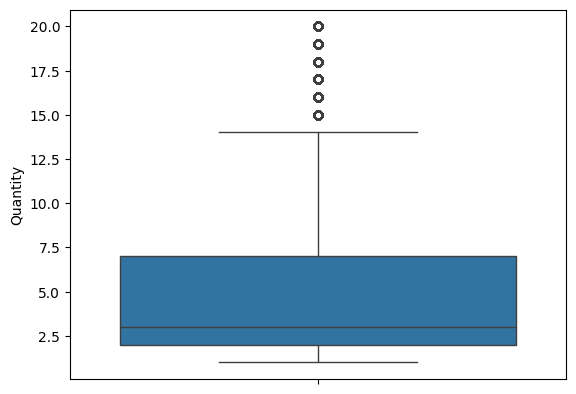

In [246]:
sns.boxplot(sales_orders['Quantity'])
plt.show()